# Teste Empírico: Karger x Abordagem Ingênua

In [95]:
from copy import deepcopy
from graph import Graph
import random
import sys
import math
import matplotlib.pyplot as plt

## Algorítimo de Karger

In [96]:
def karger(graph):
    while len(graph) > 2:
        u = random.choice(list(graph.keys()))
        v = random.choice(graph[u])
        union(graph, u, v)
    return len(list(graph.values())[0])

def union(graph, u, v):
    for node in graph[v]:
        if node != u:
            graph[u].append(node)
        graph[node].remove(v)
        if node != u:
            graph[node].append(u)
    del graph[v]

def karger_iter(graph, iter):
    minCut = sys.maxsize;
    cut = sys.maxsize;
    for _ in range(iter):
        G = deepcopy(graph)
        cut = karger(G)
        if cut < minCut:
            minCut = cut
    return minCut


## Algorítimo Ingênuo

In [97]:
def count_edges_between_sets(graph, set_a, set_b):
    count = 0
    for node in set_a:
        for adj_node in graph[node]:
            if adj_node in set_b:
                count += 1
    return count

def naive(graph):
    nodes = list(graph.keys())
    random.shuffle(nodes)
    split_index = random.randint(0, len(nodes)-1)
    set_a = nodes[:split_index]
    set_b = nodes[split_index:]
    return count_edges_between_sets(graph, set_a, set_b)

def naive_iter(graph, iter):
    minCut = sys.maxsize;
    cut = sys.maxsize;
    for _ in range(iter):
        cut = naive(graph)
        if cut < minCut:
            minCut = cut
    return minCut

## Rodando Karger $Nexec$ vezes para obter o provável corte mínimo

In [98]:
def cutInNexec(G, Nexec):
    expectedCut = sys.maxsize
    auxCut = 0
    for _ in range(Nexec):
        auxCut = karger_iter(G, 10)
        if auxCut < expectedCut:
            expectedCut = auxCut
    return expectedCut

## $Niter$, $Nexec$ e teste empírico

- Segundo os slides, uma generalização para o aumento da probabilidade de corte mínimo é $Niter = (\frac{n}{2})\cdot\log{(\frac{1}{\alpha})}$, onde $\alpha = (0,1)$ e $n$ é a quantidade de vértices no grafo.

- Os algorítimos serão executados $1, 2,..., Niter$ vezes e cada uma dessas iterações será repetida $Nexec$ vezes.

- Quanto **menor** o valor de $\alpha$, **maior** será o $Niter$.

- O valor de $\alpha$ será ajustado manualmente.  


In [99]:
def calcEmpiricalProbability(G, alpha):
    Nexec = 10_000
    Niter = math.ceil((len(G)/2)*math.log(1/alpha))
    expectedCut = cutInNexec(G, Nexec)
    probKarger = [0.0 for _ in range(Niter)]
    probNaive = [0.0 for _ in range(Niter)]

    for iter in range(Niter):
        for _ in range(Nexec):
            cut = karger_iter(G, iter)
            if cut == expectedCut:
                probKarger[iter] += 1
            cut = naive_iter(G, iter)
            if cut == expectedCut:
                probNaive[iter] += 1
        probKarger[iter] /= Nexec
        probNaive[iter] /= Nexec

    return probKarger, probNaive


## "Plotando" Gráficos

In [17]:
def plotarProb(dataKarger, dataIngenuo, titulo):
    plt.plot(dataKarger, color="blue", label="Karger")
    plt.plot(dataIngenuo, color="orange", label="Ingênuo")
    plt.legend()
    plt.title(f"Probabilidade Empírica do Grafo \"{titulo}\"")
    plt.xlabel( "N iter" )
    plt.ylabel( "Sucesso da Probabilidade Empírica")
    plt.grid()
    plt.show()

### Tabela de $\alpha_s$:


|Grafo  | graph_type1_1 | graph_type1_2 | graph_type1_3 | graph_type2_1 | graph_type2_2 | graph_type2_3 |
| --- | --- | --- | --- | --- | --- | --- |
|$\alpha$| 0.3           | 0.35           | 0.4           | 0.28           | 0.15           | 0.3          |

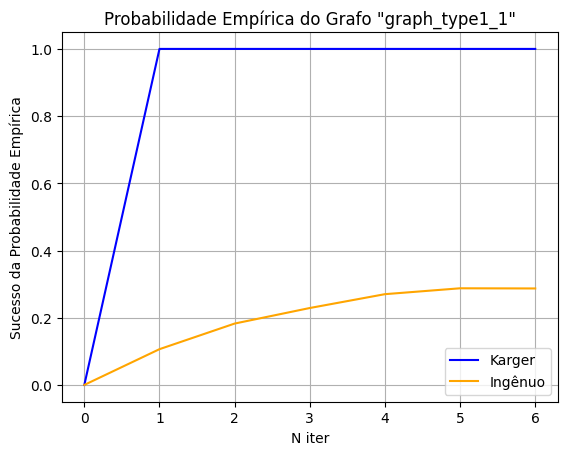

In [76]:
probKarger, probNaive = calcEmpiricalProbability(Graph('in/p3/graph_type1_1').get_adj_list_as_dict(), alpha=0.3)
plotarProb(probKarger, probNaive, 'graph_type1_1')

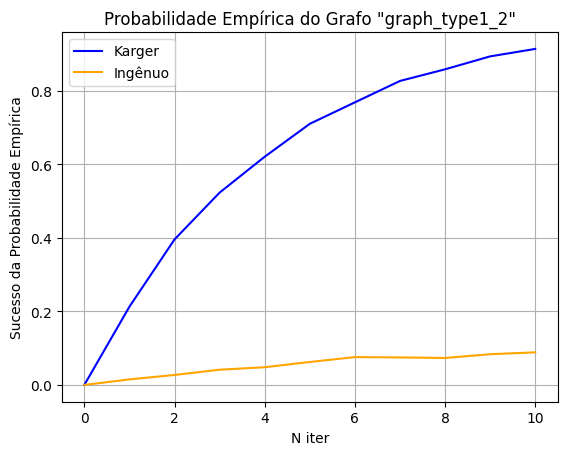

In [77]:
probKarger, probNaive = calcEmpiricalProbability(Graph('in/p3/graph_type1_2').get_adj_list_as_dict(), alpha=0.35)
plotarProb(probKarger, probNaive, 'graph_type1_2')

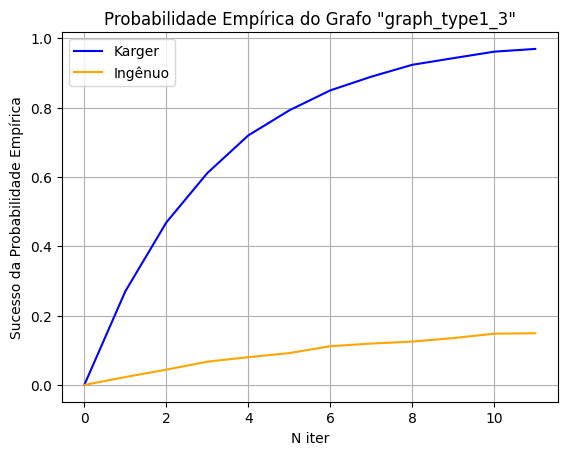

In [78]:
probKarger, probNaive = calcEmpiricalProbability(Graph('in/p3/graph_type1_3').get_adj_list_as_dict(), alpha=0.4)
plotarProb(probKarger, probNaive, 'graph_type1_3')

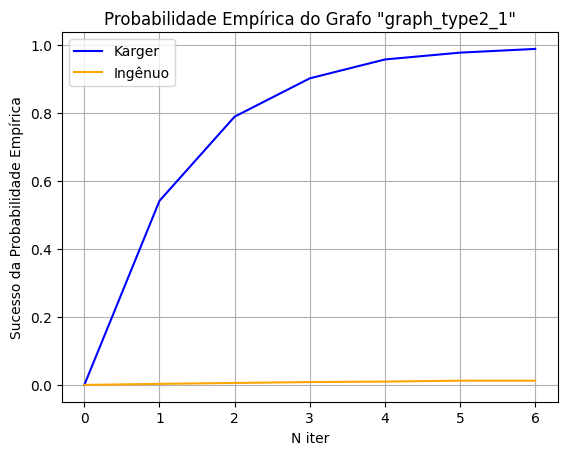

In [100]:
probKarger, probNaive = calcEmpiricalProbability(Graph('in/p3/graph_type2_1').get_adj_list_as_dict(), alpha=0.28)
plotarProb(probKarger, probNaive, 'graph_type2_1')

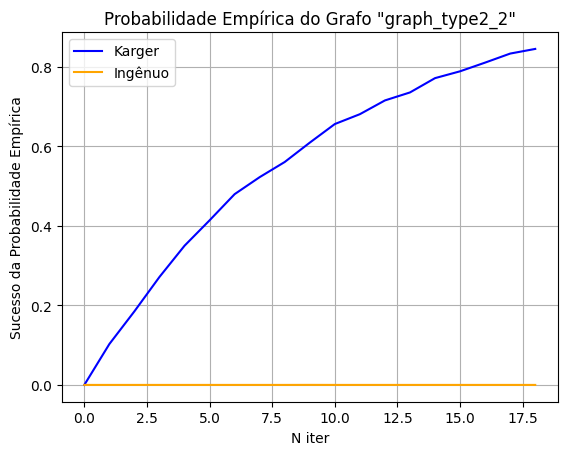

In [101]:
probKarger, probNaive = calcEmpiricalProbability(Graph('in/p3/graph_type2_2').get_adj_list_as_dict(), alpha=0.15)
plotarProb(probKarger, probNaive, 'graph_type2_2')

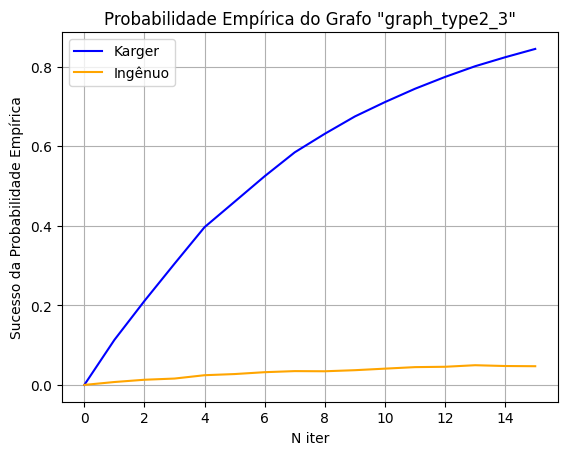

In [102]:
probKarger, probNaive = calcEmpiricalProbability(Graph('in/p3/graph_type2_3').get_adj_list_as_dict(), alpha=0.3)
plotarProb(probKarger, probNaive, 'graph_type2_3')